In [1]:
import numpy as np
import scipy.sparse as sp

from mnist import MNIST

In [2]:
from least_squares import ridge

In [14]:
import pandas as pd
%matplotlib inline

In [3]:
mndata = MNIST('./python-mnist/data')
train_ims, train_labels = mndata.load_training()
test_ims, test_labels = mndata.load_testing()

train_ims = np.array(train_ims)
test_ims = np.array(test_ims)
train_istwo = np.array([int(x==2) for x in train_labels])
test_istwo = np.array([int(x==2) for x in test_labels])

In [4]:
train_X = sp.csc_matrix(train_ims)
train_y = sp.csc_matrix([train_istwo]).T

In [5]:
little_X = train_ims[0:500, :]
little_y = train_istwo[0:500]
print(little_X.shape)
print(little_y.shape)
little_X = sp.csc_matrix(little_X)
little_y = sp.csc_matrix([little_y]).T

(500, 784)
(500,)


In [6]:
type(train_y)

scipy.sparse.csr.csr_matrix

In [43]:
sol = ridge(X = little_X, y = little_y, lam = 0.1)

/Users/janet/miniconda3/envs/mlpy3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:247: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/janet/miniconda3/envs/mlpy3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:165: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


In [44]:
print(sol)

  (41, 0)	0.000438600724589
  (42, 0)	0.00107828508818
  (43, 0)	-0.000229291260463
  (44, 0)	-0.000543954205805
  (45, 0)	-0.000136521856742
  (67, 0)	-0.00109222676414
  (68, 0)	0.00493804462076
  (69, 0)	-0.002378048485
  (70, 0)	-0.00107936929588
  (71, 0)	-0.00129596502375
  (72, 0)	0.00146644514144
  (73, 0)	-0.00217560645415
  (74, 0)	0.000293306471169
  (75, 0)	0.00281555437446
  (76, 0)	-0.00468611201339
  (90, 0)	-0.000457701540132
  (91, 0)	-0.00176093504246
  (92, 0)	0.00561693557218
  (93, 0)	-0.000875114178286
  (94, 0)	-0.00183448053414
  (95, 0)	-0.00189175859132
  (96, 0)	-0.00123776804142
  (97, 0)	0.00488839086043
  (98, 0)	-0.00205976568759
  (99, 0)	-0.000196439961869
  :	:
  (735, 0)	-0.00706718127553
  (736, 0)	-0.000226295263474
  (737, 0)	-0.00114114361078
  (738, 0)	-0.000703479744294
  (739, 0)	0.000934407883273
  (740, 0)	0.000567821876237
  (741, 0)	-0.00410343224695
  (742, 0)	-0.00438061757969
  (743, 0)	0.00534974426952
  (744, 0)	-0.00724384118773
  (74

In [45]:
#print(sol.toarray())

In [46]:
little_y

<500x1 sparse matrix of type '<class 'numpy.int64'>'
	with 52 stored elements in Compressed Sparse Row format>

In [47]:
sol.toarray()[:,0]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   4.38600725e-04,
         1.07828509e-03,  -2.29291260e-04,  -5.43954206e-04,
        -1.36521857e-04,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [48]:
print(little_X.shape)
little_X.dot(sol).toarray()[:, 0]

(500, 784)


array([  1.38278231e-05,  -9.86349431e-06,   2.11168623e-06,
         5.90328557e-05,  -1.31057284e-05,   9.99985024e-01,
         7.97498638e-05,   7.58815489e-05,   1.24080835e-05,
         1.16082490e-05,  -8.40074185e-05,  -3.86573282e-05,
        -9.88029176e-06,   4.36895301e-05,   4.74253173e-05,
         4.34578376e-05,   1.00000563e+00,  -9.73024042e-05,
        -5.52468059e-05,   6.71799401e-05,   5.18921165e-06,
         5.69722881e-05,   1.59258763e-05,  -9.02777186e-05,
        -2.38336638e-05,   9.99969302e-01,  -1.24136687e-05,
        -2.22375315e-05,   1.00000036e+00,   1.01817006e-05,
        -2.67047553e-07,   5.32879606e-05,  -6.22697058e-05,
         5.97917943e-06,  -3.51823585e-05,   3.89850082e-05,
         6.36278453e-05,  -1.11686784e-05,   1.11090970e-05,
        -1.47666648e-04,   8.83693984e-05,   2.31570824e-05,
         1.52236149e-04,  -1.35683062e-04,  -2.40154108e-05,
         7.41623490e-05,   1.10928766e-04,  -1.94474758e-05,
        -5.96784029e-05,

In [49]:
little_y.toarray()[:,0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

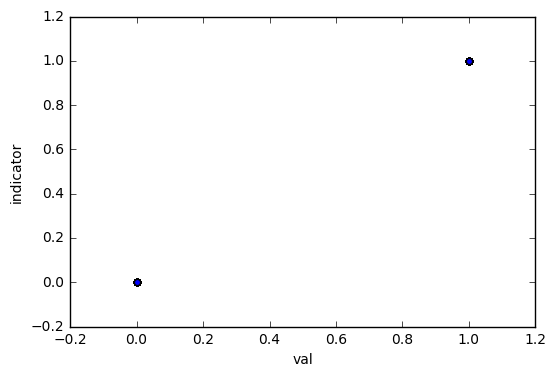

In [50]:
to_compare = pd.DataFrame({
       'val': little_X.dot(sol).toarray()[:, 0],
       'indicator': little_y.toarray()[:,0]})

to_compare.plot(kind='scatter', x='val', y='indicator')

In [13]:
full_sol = ridge(X = train_X, y = train_y, lam = 0.05)

/Users/janet/miniconda3/envs/mlpy3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:247: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/janet/miniconda3/envs/mlpy3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:165: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


In [51]:
full_sol

<784x1 sparse matrix of type '<class 'numpy.float64'>'
	with 717 stored elements in Compressed Sparse Row format>

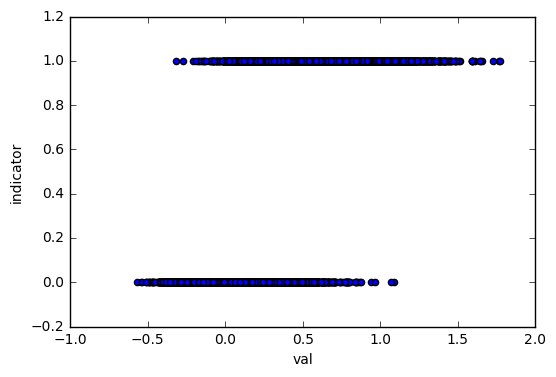

In [52]:
to_compare = pd.DataFrame({
       'val': train_X.dot(full_sol).toarray()[:, 0],
       'indicator': train_y.toarray()[:,0]})

to_compare.plot(kind='scatter', x='val', y='indicator')

In [ ]:
to_compare = pd.DataFrame({
       'val': train_X.dot(full_sol).toarray()[:, 0],
       'indicator': train_y.toarray()[:,0]})

to_compare.plot(kind='', x='val', y='indicator')